In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<strong> Problem 1 </strong>: 5pts, 37.1

*Answer 1* So, in this case we need to fuss over when 

$$
f(x) = a\left\{ \begin{array}{rl} x & 0\leq x < \frac{1}{2} \\ 1-x & \frac{1}{2}\leq x \leq 1 \end{array} \right.
$$

has a fixed point.  This means we have two cases to study.  The first is when 

$$
x = ax, ~ 0\leq x < \frac{1}{2}.
$$

Rewriting this, we get that $x(1-a)=0$, so that we always have a fixed point at $x=0$, and we have that the line $y=x$ for $0\leq x \leq 1/2$ is fixed points for $a=1$.  The second case is when

$$
x = a(1-x), ~ \frac{1}{2} \leq x \leq 1,
$$

so that $x = a/(1+a)$, but then this only applies if 

$$
\frac{1}{2} \leq \frac{a}{1+a} \leq 1, 
$$

which is equivalent to 

$$
a>1.
$$

So in summary, we have that for $0<a<1$, there is one fixed point at $x=0$.  For $a=1$, the line $y=x$ for $0\leq x\leq1/2$ is all fixed points, and for $a>1$, there are two fixed points, one at $x=0$, and one at $x=a/(1+a)$.  As for stability, for $0\leq x < 1/2$, we have 

$$
\left|f'(0)\right| = a
$$

and for $a>1$, for $1/2\leq x \leq 1$, we have that 

$$
\left|f'\left(\frac{a}{1+a}\right)\right| = a
$$

Thus, for $0<a<1$, we have one stable or attractive fixed point at $x=0$, and for $a>1$, we both fixed points are unstable or repellant.  

<strong> Problem 2 </strong>: 5pts, 37.2.  Note, ignore exercise 4.  Use the code provided in class for drawing bifurcation diagrams as a model.  

*Answer 2* So first, we want to define a tent map function.  Thus we write

In [4]:
def tmap(x,a):
    if x < .5:
        return a*x
    else:
        return a*(1-x)

Then we need to take into account that as we see from above, the bifurcation happens at $a=1$, and since 

$$
\max_{0\leq x \leq 1} f(x) = \frac{a}{2},
$$

we have that 

$$
f:[0,1]\rightarrow \left[0,\frac{a}{2}\right] \subset [0,1],
$$

only if $a\leq 2$.  Note this ensures "trapping", or that the sequence $x_{n}$ stays inside the box $[0,1]\times[0,1]$, where again $x_{n} = f(x_{n-1})$.  Thus instead of looking at 

`avals = np.linspace(2.9,3.99,Navals)`,

we want to use something like 

`avals = np.linspace(.9,1.99,Navals)`

See the code below.


In [79]:
def bifur_plot(navals,cnt,al,ah):
    avals = np.linspace(al,ah,navals)
    ivals = .25*np.ones([cnt,len(avals)])
    cup = 3*cnt/4
    cdown = cnt/4
    
    plt.figure()
    for jj in range(0,len(avals)):
        for kk in range(1,cnt):
            ivals[kk,jj] = tmap(ivals[kk-1,jj],avals[jj])
        apoints = avals[jj]*np.ones([cdown,1])
        plt.scatter(apoints,ivals[cup:,jj],s=5)
        plt.xlim(al,ah)
    fig = plt.gcf()
    fig.set_size_inches(10,4)

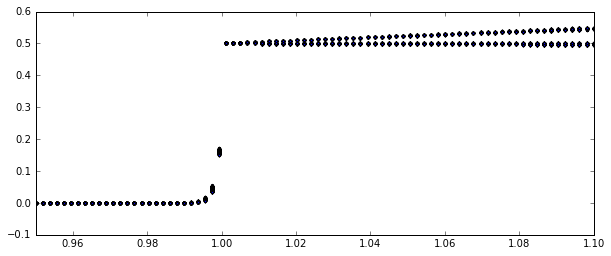

In [80]:
bifur_plot(80,800,.95,1.1) # Here we see the period doubling

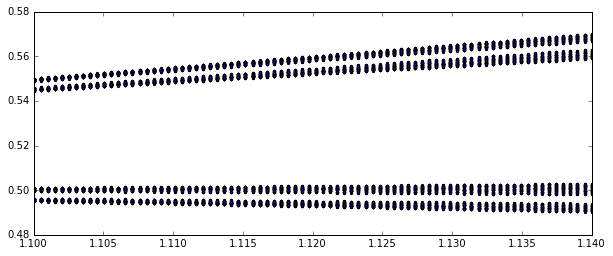

In [81]:
bifur_plot(80,800,1.1,1.14) # And more period doubling, hey!

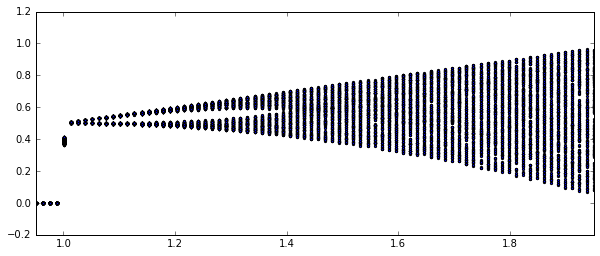

In [82]:
bifur_plot(80,800,.95,1.95)

<strong> Problem 3 </strong>: 5pts, 37.3.  Use the code for generating the bifurcation plot presented in lecture as a way to get approximate values for those $a$ at which you see stable $2$, $3$, $4$ etc... cycles.  

*Answer 3* To do all this, I would just change the function definition slightly so that we can easily adjust the range of $a$ values we want to look at.  See the code below and how it is used.   

In [65]:
def bifur_plot(navals,al,ah,cnt): # Just put in al and ah
    avals = np.linspace(al,ah,navals) # Now we can easily adjust the low and high values of a!
    ivals = .5*np.ones([cnt,len(avals)])
    cup = 3*cnt/4
    cdown = cnt/4
    
    plt.figure()
    for jj in range(0,len(avals)):
        for kk in range(1,cnt):
            ivals[kk,jj] = avals[jj]*ivals[kk-1,jj]*(1.-ivals[kk-1,jj])
        apoints = avals[jj]*np.ones([cdown,1])
        plt.scatter(apoints,ivals[cup:,jj],s=5)
        plt.xlim(al,ah)
    fig = plt.gcf()
    fig.set_size_inches(10,4)

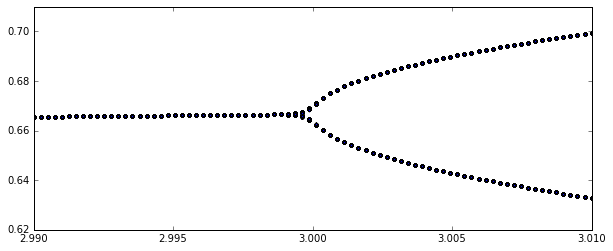

In [66]:
bifur_plot(80,2.99,3.01,6400) # Yay, period 2 at a = 3!

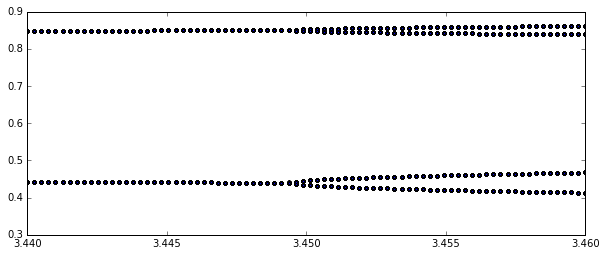

In [69]:
bifur_plot(80,3.44,3.46,6400) # Yay, period 4 at about a little less than a = 3.45

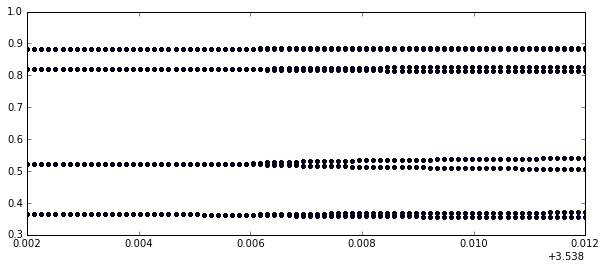

In [70]:
bifur_plot(80,3.54,3.55,6400) # Yay, period 8 at about a little less than a = 3.545.

So, technically, the book is a little off in a sense.  Once we get into chaotic dynamics, we get all periods.  So if we look at 

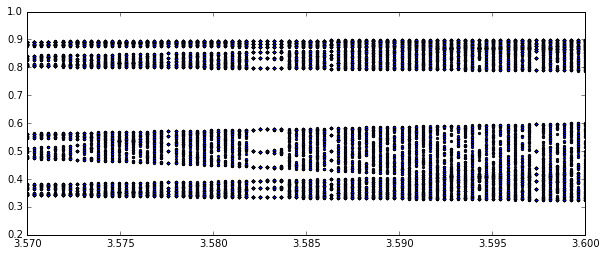

In [71]:
bifur_plot(80,3.57,3.6,800) # So, somewhere between 3.57 and 3.58, we arguably have every possible period, though don't quote me.

<strong> Problem 4 </strong>: 5pts, 37.5.  Feel free to use the code from lecture as a starting point.  

*Answer 4* So as near as I can tell, you  just need to change the function header I provided in class, and then at the very end, tack on the lines 

`plt.xlim(xmin,xmax)`

`plt.ylim(ymin,ymax)`



In [72]:
def cob_plot(f, x0, n, xmin, xmax, ymin, ymax):
    xvals = [0]*(n+1)
    xvals[0] = x0
    for jj in range(1,n+1):
        xvals[jj] = f(xvals[jj-1])
    
    # Note, the list xvals[0:n] is the x-axis or x_(n-1) values
    # Note, the list xvals[1:] is the y-axis or x_n values
    
    plt.scatter(xvals[0:n],xvals[1:]) # To plot the points
    plt.scatter(xvals[1:],xvals[1:]) # To plot the points y=x
    
    for kk in range(1,n):
        plt.plot([xvals[kk-1],xvals[kk]],[xvals[kk],xvals[kk]],color="k",ls="--") # Plot the horizontal bar
        plt.plot([xvals[kk],xvals[kk]],[xvals[kk],xvals[kk+1]],color="k",ls="--") # Plot the vertical bar
    
    plt.plot(xvals,xvals,color="k",ls="-")
    plt.xlabel("$x_{n-1}$")
    plt.ylabel("$x_{n}$")
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)

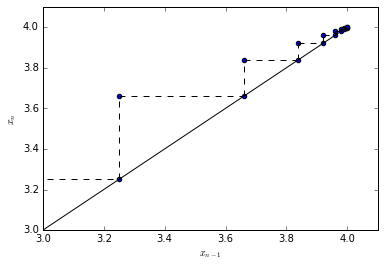

In [73]:
cob_plot(lambda x: x**2/16.+3.,2.,10, 3., 4.1, 3., 4.1)